In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("final").getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled","true")

# train data

In [3]:
part1 = spark.read.parquet("hdfs://localhost:9000/finalDB/Partial1.parquet")
part1.show()

+--------+---+-------+-------+-------+------+----------------+
|      ID| X1|     X2|     X3|     X4|    X5|               Y|
+--------+---+-------+-------+-------+------+----------------+
|P1000002| A3| 0.1972|  6.563| 8.4542|Group3|27612.3830690663|
|P1000007| A1|-0.9084| 10.491| 9.8017|Group2|9150.26570738822|
|P1000030| A3| 0.3164| 11.341|14.8871|Group2|76579.6846859015|
|P1000046| A2| 0.7928| 11.831| 8.7676|Group2| 51189.603726392|
|P1000060| A1| 0.4274| 17.689|10.6112|Group2|148313.339805297|
|P1000064| A1|-1.5066| 19.845| 9.7027|Group2| 61074.026560969|
|P1000083| A1| 1.1936|  3.574| 7.8773|Group1| 50632.088794274|
|P1000084| A2|-1.1741|   4.27|10.4408|Group2|3065.22776267054|
|P1000087| A1|-0.3164|  3.105|13.7127|Group1|6159.11438564402|
|P1000129| A2|-0.4274| -0.509|   null|Group2|159393.020826127|
|P1000134| A3|-0.3956| 17.278| 9.9707|Group2|17878.3668202395|
|P1000135| A2| 1.7911|-10.606| 7.4471|Group2|126520.220925557|
|P1000144| A2|-1.0985| 16.782|10.6775|Group2|2877.21069

In [4]:
part2 = spark.read.parquet("hdfs://localhost:9000/finalDB/Partial2.parquet")
part2.show()

+--------+---+-------+------+-------+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|
+--------+---+-------+------+-------+------+----------------+
|P2719506| A2| 0.5635| 19.53|10.7549|Group2|9472.15793711915|
|P2719527| A3| 0.6974| 5.715| 9.4916|Group2|44303.9092649457|
|P2719528| A4|-0.4836| 4.853|  9.343|Group2|52246.9977763756|
|P2719535| A4|-0.5615|20.953| 7.1045|Group1|56845.0541589212|
|P2719540| A3|-1.4082| 9.077| 8.7619|Group1|7196.05546706117|
|P2719544| A3| 1.3919|18.076| 9.2163|Group3|60284.5425136252|
|P2719568| A4| 1.3628|16.896| 8.4481|Group3|87868.9754856233|
|P2719573| A3|-0.4226| 6.282| 8.4585|Group2|2764.75772700315|
|P2719578| A3|-1.8137|25.886|12.7381|Group2|43816.3282019522|
|P2719587| A2|-0.1503| 5.928| 10.047|Group2|4850.47692206552|
|P2719591| A1|-0.8007|12.529|11.2761|Group3|23402.6673160544|
|P2719593| A3|-1.0958|-3.465|14.4829|Group3|33630.6491501798|
|P2719598| A2|-0.6077|10.432| 9.3188|Group2|69004.1641604068|
|P271960

In [5]:
part3 = spark.read.option('header', 'true').csv("hdfs://localhost:9000/finalDB/Partial3.csv", inferSchema=True)
part3.show()

+--------+---+-------+------+-------+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|
+--------+---+-------+------+-------+------+----------------+
|P5296770| A1|-0.1934|26.697|     NA|Group2|83223.5089882021|
|P5296771| A2|  0.068|10.071| 6.1157|Group1|43143.3482288991|
|P5296777| A2|-1.7123| 3.661|  9.493|Group2|1550.53998250517|
|P5296784| A4| 0.1998| 19.85| 9.3692|Group2|7572.07919410697|
|P5296787| A2|-1.4737|18.933|12.1682|Group2|5895.67818712711|
|P5296792| A3|-0.7172|23.318| 5.7581|Group2|591.379519815538|
|P5296797| A3| 0.9106| 9.803| 9.5171|Group1| 84390.077175249|
|P5296801| A4|-0.6138| 9.279|  6.969|Group3| 22383.329163738|
|P5296804| A4| 0.9997|13.654|  7.841|Group2|387864.997228424|
|P5296806| A2| 0.1604| 0.877|10.7047|Group2|314654.491913031|
|P5296812| A2| 0.0066| 3.463| 7.3294|Group1|42859.7258388003|
|P5296818| A3| 1.4919| 7.673|11.3736|Group1|263935.836661629|
|P5296843| A3| -1.186| 3.179| 8.6388|Group3| 6773.9303200115|
|P529685

In [6]:
part4 = spark.read.parquet("hdfs://localhost:9000/finalDB/Partial4.parquet")
part4.show()

+--------+----+----+--------+---+------+
|      ID|  X6|  X7|      X8| X9|   X10|
+--------+----+----+--------+---+------+
|P1000002| 5.0|Age4|10.60235| 82|  Male|
|P1000007| 4.0|Age4|10.61032|113|  Male|
|P1000030| 5.0|Age3|  9.6749|144|  Male|
|P1000046| 6.0|Age2| 9.97378| 97|  Male|
|P1000060| 6.0|Age4| 9.90083|115|Female|
|P1000064| 7.0|Age5| 9.47728|106|Female|
|P1000083| 4.0|Age2|10.02851|132|  null|
|P1000084| 3.0|Age3|10.09016| 69|Female|
|P1000087| 5.0|Age2| 9.64176| 81|  Male|
|P1000129| 5.0|Age6| 9.74908|124|  Male|
|P1000134|null|Age3| 9.90555| 87|Female|
|P1000135| 5.0|Age3| 9.96361|100|  Male|
|P1000144| 4.0|Age1| 9.36281|111|Female|
|P1000155|null|Age5|11.03876| 94|  Male|
|P1000159| 5.0|Age5|10.26507| 86|  null|
|P1000161| 7.0|Age5| 9.03383|143|  Male|
|P1000168| 4.0|Age4|  9.9605|110|  Male|
|P1000184|null|Age2|10.39374| 88|Female|
|P1000196| 5.0|Age3|10.40964| 76|Female|
|P1000201| 3.0|Age3| 11.2311|130|  Male|
+--------+----+----+--------+---+------+
only showing top

In [7]:
part5 = spark.read.option('header', 'true').csv("hdfs://localhost:9000/finalDB/Partial5.csv")
part5.show()

+--------+---+-------+------+-------+------+---+----+--------+---+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5| X6|  X7|      X8| X9|   X10|               Y|
+--------+---+-------+------+-------+------+---+----+--------+---+------+----------------+
|P7012624| A1|-0.1718|-6.029|10.0731|Group2|  5|Age2|11.18789|110|Female| 1809.4066683521|
|P7012632| A1| 0.6555|19.096|14.8677|Group2| NA|Age2|11.65603| 75|  Male|6169.86544506177|
|P7012650| A2| 1.5115| 22.17| 9.8844|Group2|  5|Age2| 7.05619|107|  Male|1308083.55599052|
|P7012666| A2| 0.5592|18.946| 9.9524|Group2|  3|Age5|10.18829|120|  Male|335458.799456466|
|P7012667| A2|-1.2013|  0.79| 9.1048|Group2|  7|Age1|10.16804| 83|  Male|774.036249751602|
|P7012674| A1|-0.2493| 3.153| 9.7621|Group2|  4|Age5| 8.81591| 98|Female|156425.091386052|
|P7012677| A2|-0.4913|-0.263| 7.6003|Group2|  6|Age2| 9.57989| 92|  Male| 8592.8939887216|
|P7012680| A4| 1.0269| 1.933| 9.0063|Group2|  5|Age4| 9.29235| 86|  Male|318925.796855421|

### union data

In [8]:
Sdata = part1.union(part2)

In [9]:
Sdata = Sdata.union(part3)

In [10]:
Sdata.show()

+--------+---+-------+-------+-------+------+----------------+
|      ID| X1|     X2|     X3|     X4|    X5|               Y|
+--------+---+-------+-------+-------+------+----------------+
|P1000002| A3| 0.1972|  6.563| 8.4542|Group3|27612.3830690663|
|P1000007| A1|-0.9084| 10.491| 9.8017|Group2|9150.26570738822|
|P1000030| A3| 0.3164| 11.341|14.8871|Group2|76579.6846859015|
|P1000046| A2| 0.7928| 11.831| 8.7676|Group2| 51189.603726392|
|P1000060| A1| 0.4274| 17.689|10.6112|Group2|148313.339805297|
|P1000064| A1|-1.5066| 19.845| 9.7027|Group2| 61074.026560969|
|P1000083| A1| 1.1936|  3.574| 7.8773|Group1| 50632.088794274|
|P1000084| A2|-1.1741|   4.27|10.4408|Group2|3065.22776267054|
|P1000087| A1|-0.3164|  3.105|13.7127|Group1|6159.11438564402|
|P1000129| A2|-0.4274| -0.509|   null|Group2|159393.020826127|
|P1000134| A3|-0.3956| 17.278| 9.9707|Group2|17878.3668202395|
|P1000135| A2| 1.7911|-10.606| 7.4471|Group2|126520.220925557|
|P1000144| A2|-1.0985| 16.782|10.6775|Group2|2877.21069

In [11]:
Sdata = Sdata.join(part4, ['ID'], 'inner')

In [12]:
Sdata.show()

+--------+---+-------+------+-------+------+----------------+----+----+--------+---+------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|  X6|  X7|      X8| X9|   X10|
+--------+---+-------+------+-------+------+----------------+----+----+--------+---+------+
|P1000060| A1| 0.4274|17.689|10.6112|Group2|148313.339805297| 6.0|Age4| 9.90083|115|Female|
|P1000134| A3|-0.3956|17.278| 9.9707|Group2|17878.3668202395|null|Age3| 9.90555| 87|Female|
|P1000225| A2|-0.4578|-0.326|10.1997|Group1|25117.4149775698| 7.0|Age4| 9.89995| 75|  Male|
|P1000235| A2|-0.4115|-5.716| 9.2232|Group2|43666.8277002937| 5.0|Age4| 9.07033|128|  null|
|P1000277| A4| 0.2783|10.754| 10.626|Group2| 3590.2300979165| 5.0|Age3|12.54388|100|  Male|
|P1000318| A2|-1.0334|10.578| 8.5691|Group3|28899.5318549702| 5.0|Age3| 8.45483| 80|  Male|
|P1000333| A3| 1.1541|-2.002| 8.7333|Group2|72271.0912572226|null|Age2| 9.23122|129|  null|
|P1000342| A4|-0.4945|24.935|10.6905|Group2|8680.83289773887| 5.0|Age4|  12.075|

In [13]:
Sdata = Sdata.unionByName(part5)

In [14]:
Sdata.show(5)

+--------+---+-------+------+-------+------+----------------+----+----+--------+---+------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|  X6|  X7|      X8| X9|   X10|
+--------+---+-------+------+-------+------+----------------+----+----+--------+---+------+
|P1000342| A4|-0.4945|24.935|10.6905|Group2|8680.83289773887| 5.0|Age4|  12.075|102|  Male|
|P1000864| A4| 1.7582| 8.017| 9.9748|Group2|815078.562414822|null|Age5| 9.96618| 88|Female|
|P1005777| A3|-0.9239|11.739| 7.2338|Group1|106371.230243878| 6.0|Age6|  9.5947| 85|Female|
|P1006134| A1|-0.6068|-7.772|13.1339|Group2|10852.2018059725| 5.0|Age3| 9.29497|114|  Male|
|P1006412| A4| 0.7677| 2.398|10.2349|Group2| 34034.552569579| 5.0|Age5|12.10124| 91|Female|
+--------+---+-------+------+-------+------+----------------+----+----+--------+---+------+
only showing top 5 rows



## to pandas

In [15]:
data = Sdata.toPandas()

In [16]:
data = data[['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y']]

In [17]:
data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,P1000342,A4,-0.4945,24.935,10.6905,Group2,5.0,Age4,12.075,102,Male,8680.83289773887
1,P1000864,A4,1.7582,8.017,9.9748,Group2,None,Age5,9.96618,88,Female,815078.562414822
2,P1005777,A3,-0.9239,11.739,7.2338,Group1,6.0,Age6,9.5947,85,Female,106371.230243878
3,P1006134,A1,-0.6068,-7.772,13.1339,Group2,5.0,Age3,9.29497,114,Male,10852.2018059725
4,P1006412,A4,0.7677,2.398,10.2349,Group2,5.0,Age5,12.10124,91,Female,34034.552569579


## data type

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ID      1100000 non-null  object
 1   X1      1095186 non-null  object
 2   X2      1100000 non-null  object
 3   X3      1100000 non-null  object
 4   X4      1081601 non-null  object
 5   X5      1099062 non-null  object
 6   X6      1038476 non-null  object
 7   X7      1100000 non-null  object
 8   X8      1100000 non-null  object
 9   X9      1100000 non-null  object
 10  X10     1078024 non-null  object
 11  Y       1100000 non-null  object
dtypes: object(12)
memory usage: 100.7+ MB


In [19]:
part1.printSchema()

root
 |-- ID: string (nullable = true)
 |-- X1: string (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: string (nullable = true)
 |-- Y: double (nullable = true)



In [20]:
part4.printSchema()

root
 |-- ID: string (nullable = true)
 |-- X6: double (nullable = true)
 |-- X7: string (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: short (nullable = true)
 |-- X10: string (nullable = true)



In [21]:
lst = ['X2', 'X3', 'X4', 'X6', 'X8', 'Y']

for col in lst:
    data[col] = data[col].replace('NA', -999)
    data[col] = data[col].astype('double')
    data[col] = data[col].replace(-999, np.nan)
    
data['X9'] = data['X9'].astype('short')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   ID      1100000 non-null  object 
 1   X1      1095186 non-null  object 
 2   X2      1100000 non-null  float64
 3   X3      1100000 non-null  float64
 4   X4      1059405 non-null  float64
 5   X5      1099062 non-null  object 
 6   X6      1015249 non-null  float64
 7   X7      1100000 non-null  object 
 8   X8      1100000 non-null  float64
 9   X9      1100000 non-null  int16  
 10  X10     1078024 non-null  object 
 11  Y       1100000 non-null  float64
dtypes: float64(6), int16(1), object(5)
memory usage: 94.4+ MB


In [23]:
data.isna().sum()

ID         0
X1      4814
X2         0
X3         0
X4     40595
X5       938
X6     84751
X7         0
X8         0
X9         0
X10    21976
Y          0
dtype: int64

## drop duplicates

In [24]:
data.shape

(1100000, 12)

In [25]:
data = data.drop_duplicates(['ID'], keep='first', ignore_index=True)

In [26]:
df_id = data[['ID']]

In [27]:
data.shape

(1000000, 12)

# test data

In [28]:
testX = spark.read.option('header', 'true').csv("hdfs://localhost:9000/finalDB/TestX.csv")
testY = spark.read.option('header', 'true').csv("hdfs://localhost:9000/finalDB/TestY.csv")

In [29]:
testX = testX.toPandas()
testY = testY.toPandas()

In [30]:
test = pd.merge(testX, testY, on=['ID'], how='right')
test

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,P9920380,A2,0.2921,17.636,10.6735,Group2,6,Age2,10.81764,113,Female,13441.9471005922
1,P9619726,A2,1.0492,23.758,13.1427,Group2,5,Age2,11.0113,96,Male,37465.0559510013
2,P9851405,A4,0.6842,26.687,6.7143,Group2,6,Age3,8.65085,109,Female,345725.74044955
3,P9764914,A3,-0.6416,12.955,11.5501,Group2,6,Age4,10.52249,125,Male,23663.0498937355
4,P9615948,A2,1.1395,20.243,10.3386,Group2,5,Age4,8.39666,86,Male,1608375.72917404
...,...,...,...,...,...,...,...,...,...,...,...,...
48595,P9599067,A1,1.6197,-4.713,11.1224,Group2,5,Age3,7.56934,88,Female,887727.955459428
48596,P9851235,A3,0.1437,8.867,12.6313,Group3,5,Age1,9.84248,121,NA,9297.56648520998
48597,P9658431,A1,-0.9883,14.446,NA,Group1,5,Age4,9.43371,139,Male,31485.7594803602
48598,P9661211,A1,0.358,21.694,8.4582,Group3,5,Age2,10.90353,123,Male,21720.4420341918


In [31]:
lst = ['X2', 'X3', 'X4', 'X6', 'X8']

for col in lst:
    test[col] = test[col].replace('NA', -999)
    test[col] = test[col].astype('double')
    test[col] = test[col].replace(-999, np.nan)
    
test['X9'] = test['X9'].astype('short')

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48600 entries, 0 to 48599
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      48600 non-null  object 
 1   X1      48600 non-null  object 
 2   X2      48600 non-null  float64
 3   X3      48600 non-null  float64
 4   X4      46742 non-null  float64
 5   X5      48600 non-null  object 
 6   X6      44818 non-null  float64
 7   X7      48600 non-null  object 
 8   X8      48600 non-null  float64
 9   X9      48600 non-null  int16  
 10  X10     48600 non-null  object 
 11  Y       48600 non-null  object 
dtypes: float64(5), int16(1), object(6)
memory usage: 4.2+ MB


## histogram

array([[<Axes: title={'center': 'X2'}>, <Axes: title={'center': 'X3'}>,
        <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: >, <Axes: >]], dtype=object)

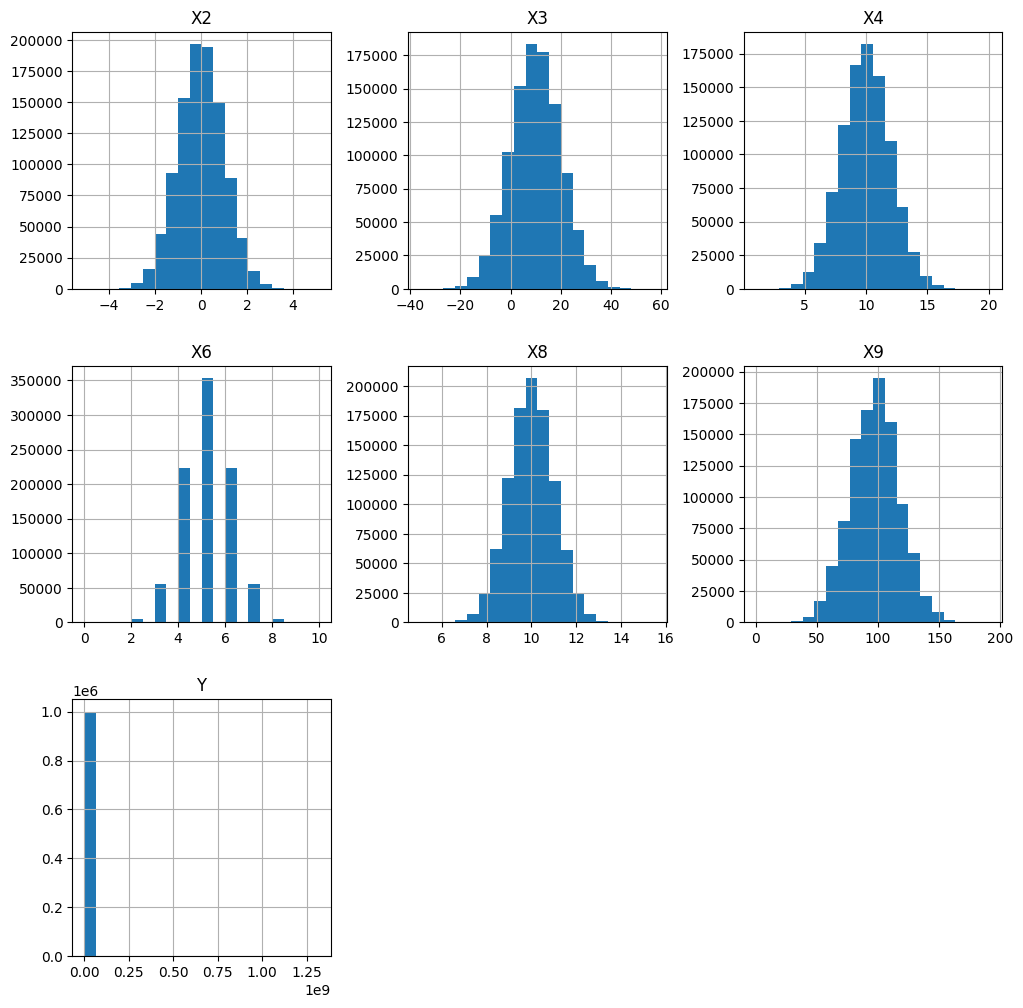

In [33]:
data.hist(bins=20, figsize=(12,12))

array([[<Axes: title={'center': 'X2'}>, <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>]],
      dtype=object)

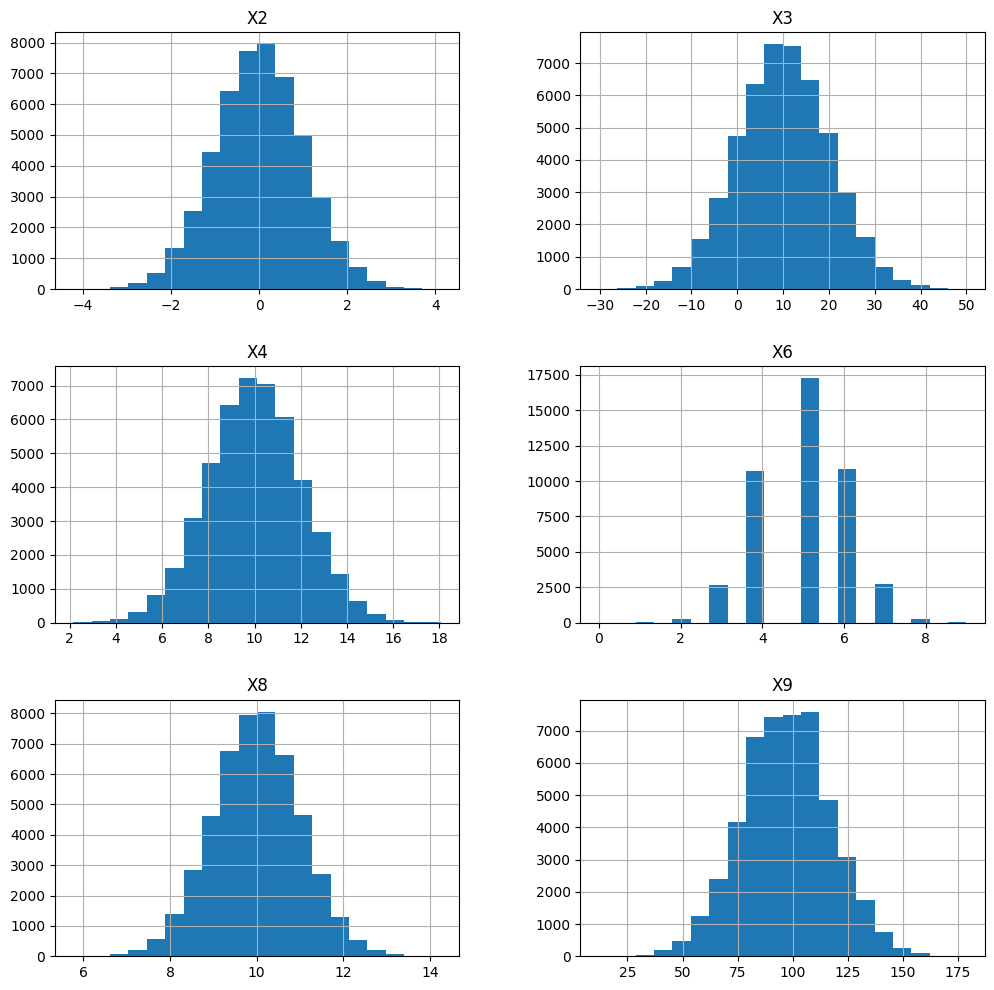

In [34]:
test.hist(bins=20, figsize=(12, 12))

In [35]:
numeric = ['X2', 'X3', 'X4', 'X6', 'X8', 'X9', 'Y']

for col in numeric:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(data[col].kurt())  
         )

X2              Skewness: 00.00     Kurtosis: -00.00
X3              Skewness: -0.00     Kurtosis: -00.00
X4              Skewness: -0.00     Kurtosis: -00.01
X6              Skewness: 00.00     Kurtosis: -00.00
X8              Skewness: 00.00     Kurtosis: -00.00
X9              Skewness: -0.00     Kurtosis: -00.00
Y               Skewness: 182.92     Kurtosis: 78437.10


y의 왜도, 첨도 큼 -> 분포 변환 필요

## missing values

In [33]:
data.isna().sum()

ID         0
X1      4814
X2         0
X3         0
X4     36868
X5       938
X6     76994
X7         0
X8         0
X9         0
X10    21976
Y          0
dtype: int64

In [34]:
test.isna().sum()

ID        0
X1        0
X2        0
X3        0
X4     1858
X5        0
X6     3782
X7        0
X8        0
X9        0
X10       0
Y         0
dtype: int64

### categoric -> dropna

In [35]:
data2 = data.copy()

In [44]:
test2 = test.copy()

In [36]:
numeric = data.select_dtypes(include = np.number).columns.tolist()
categoric = data.select_dtypes(exclude = np.number).columns.tolist()

In [45]:
for col in categoric:
    data[col] = data[col].replace('NA', np.nan)
    print(col, ": ", data[col].isna().sum())

ID :  0
X1 :  9620
X5 :  1899
X7 :  0
X10 :  27427


In [46]:
data.dropna(subset=categoric, inplace=True)

In [47]:
for col in categoric:
    test[col] = test[col].replace('NA', np.nan)
    print(col, ": ", test[col].isna().sum())

ID :  0
X1 :  477
X5 :  104
X7 :  0
X10 :  1303


In [48]:
test.dropna(subset=categoric, inplace=True)

### data2 ) categoric -> fillna(mode)

In [37]:
for col in categoric:
    data2[col] = data2[col].replace('NA', np.nan)
    print(col, ": ", data[col].isna().sum())

ID :  0
X1 :  4814
X5 :  938
X7 :  0
X10 :  21976


In [38]:
data2['X1'].fillna(data2["X1"].mode()[0], inplace=True)
data2['X5'].fillna(data2["X5"].mode()[0], inplace=True)
data2['X10'].fillna(data2["X10"].mode()[0], inplace=True)

In [39]:
data2.isna().sum()

ID         0
X1         0
X2         0
X3         0
X4     36868
X5         0
X6     76994
X7         0
X8         0
X9         0
X10        0
Y          0
dtype: int64

In [49]:
for col in categoric:
    test2[col] = test2[col].replace('NA', np.nan)
    print(col, ": ", test2[col].isna().sum())

ID :  0
X1 :  477
X5 :  104
X7 :  0
X10 :  1303


In [50]:
test2['X1'].fillna(test2["X1"].mode()[0], inplace=True)
test2['X5'].fillna(test2["X5"].mode()[0], inplace=True)
test2['X10'].fillna(test2["X10"].mode()[0], inplace=True)

In [51]:
test2.isna().sum()

ID        0
X1        0
X2        0
X3        0
X4     1858
X5        0
X6     3782
X7        0
X8        0
X9        0
X10       0
Y         0
dtype: int64

### numeric -> IterativeImputer

In [51]:
data.describe()
# 크게 이상치는 없어 보임

,X2,X3,X4,X6,X8,X9,Y
count,961376.000000,961376.000000,925938.000000,887341.000000,961376.000000,961376.000000,9.613760e+05
mean,0.000933,10.002403,10.001654,5.001672,10.000055,97.288772,3.092371e+05
std,1.001100,9.996850,2.001451,1.041385,0.999996,19.992326,2.534714e+06
min,-5.091300,-36.183000,1.026900,0.000000,5.026390,0.000000,2.718282e+00
25%,-0.673800,3.260000,8.651800,4.000000,9.324160,84.000000,9.292452e+03
50%,0.001300,10.000000,10.002200,5.000000,10.000330,97.000000,3.728181e+04
75%,0.676800,16.748000,11.352500,6.000000,10.675090,111.000000,1.489506e+05
max,4.696400,57.621000,20.164600,10.000000,15.512710,192.000000,1.318816e+09


In [52]:
test.describe()

,X2,X3,X4,X6,X8,X9
count,46730.000000,46730.000000,44937.000000,43086.000000,46730.000000,46730.000000
mean,0.002731,10.027319,10.002085,5.005060,9.998560,97.212027
std,1.001800,10.007281,2.004245,1.040381,1.002363,19.993644
min,-4.227100,-30.219000,2.147600,0.000000,5.767700,12.000000
25%,-0.673875,3.219000,8.643300,4.000000,9.328833,84.000000
50%,0.001950,10.020000,9.997600,5.000000,10.001975,97.000000
75%,0.677100,16.806000,11.351100,6.000000,10.669565,111.000000
max,4.127900,49.791000,18.064000,9.000000,14.248930,179.000000


In [40]:
# KNNIMputer를 먼저 시도했는데, 무한로딩이 되어서 확률대체로
# 값들 사이의 연관은 없으니 확률대체도 괜찮다고 생각

from sklearn.experimental import enable_iterative_imputer # noqa
from sklearn.impute import IterativeImputer

In [41]:
imputer = IterativeImputer(random_state = 0)
imputer.set_output(transform = 'pandas')

IterativeImputer(random_state=0)

In [52]:
data[numeric] = imputer.fit_transform(data[numeric])

In [42]:
data2[numeric] = imputer.fit_transform(data[numeric])

In [53]:
test[numeric] = imputer.fit_transform(test[numeric])

In [54]:
test2[numeric] = imputer.fit_transform(test2[numeric])

In [55]:
data.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

In [43]:
data2.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

In [56]:
test.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

In [57]:
test2.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

# x, y split

In [58]:
trainX = data.drop(['ID', 'Y'], axis=1)
trainY = data.Y

In [59]:
trainX2 = data2.drop(['ID', 'Y'], axis=1)
trainY2 = data2.Y

In [60]:
print(trainX.shape)
print(trainY.shape)

(961376, 10)
(961376,)


In [61]:
testX = test.drop(['ID', 'Y'], axis=1)
testY = test.Y

In [62]:
testX2 = test2.drop(['ID', 'Y'], axis=1)
testY2 = test2.Y

In [63]:
print(testX.shape)
print(testY.shape)

(46730, 10)
(46730,)


## scaling
- 가변수처리보다 먼저

In [64]:
tnumeric = ['X2', 'X3', 'X4', 'X6', 'X8', 'X9']
tcategoric = ['X1', 'X5', 'X7', 'X10']

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(trainX[tnumeric])

MinMaxScaler()

In [66]:
trainX[tnumeric] = scaler.transform(trainX[tnumeric])

testX[tnumeric] = scaler.fit_transform(testX[tnumeric])

In [67]:
trainX.describe()

,X2,X3,X4,X6,X8,X9
count,961376.000000,961376.000000,961376.000000,961376.000000,961376.000000,961376.000000
mean,0.520269,0.492361,0.468957,0.500167,0.474300,0.506712
std,0.102281,0.106572,0.102636,0.100048,0.095362,0.104127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.451332,0.420483,0.401532,0.400000,0.409845,0.437500
50%,0.520306,0.492335,0.468962,0.500000,0.474327,0.505208
75%,0.589321,0.564272,0.536449,0.600000,0.538673,0.578125
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
testX.describe()

,X2,X3,X4,X6,X8,X9
count,46730.000000,46730.000000,46730.000000,46730.000000,46730.000000,46730.000000
mean,0.506263,0.503016,0.493484,0.556117,0.498850,0.510252
std,0.119904,0.125075,0.123484,0.110999,0.118186,0.119722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425281,0.417923,0.412202,0.444444,0.419884,0.431138
50%,0.506170,0.502925,0.493409,0.555556,0.499252,0.508982
75%,0.586978,0.587739,0.574419,0.666667,0.577966,0.592814
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [70]:
trainX2[tnumeric] = ss.fit_transform(trainX2[tnumeric])
testX2[tnumeric] = ss.fit_transform(testX2[tnumeric])

In [71]:
trainX2.describe()

,X2,X3,X4,X6,X8,X9
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,5.982770e-18,9.076828e-17,2.593133e-15,-3.500331e-15,-4.003709e-15,2.126228e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.087917e+00,-4.618559e+00,-4.568966e+00,-4.998807e+00,-4.972999e+00,-4.866454e+00
25%,-6.740082e-01,-6.743741e-01,-6.569043e-01,-1.001015e+00,-6.759759e-01,-6.648831e-01
50%,2.278854e-04,-4.255556e-04,6.590917e-05,-1.566974e-03,2.523419e-04,-1.463993e-02
75%,6.749636e-01,6.746231e-01,6.576206e-01,9.978811e-01,6.749707e-01,6.856220e-01
max,5.125941e+00,4.762518e+00,5.173872e+00,4.995673e+00,5.512597e+00,4.737137e+00


In [72]:
testX2.describe()

,X2,X3,X4,X6,X8,X9
count,4.860000e+04,4.860000e+04,4.860000e+04,4.860000e+04,4.860000e+04,4.860000e+04
mean,-2.573159e-17,4.503028e-17,2.639681e-16,4.723793e-16,-3.576106e-16,3.090715e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-4.221793e+00,-4.017526e+00,-3.990322e+00,-5.008924e+00,-4.221940e+00,-4.257549e+00
25%,-6.755809e-01,-6.798575e-01,-6.579070e-01,-1.005227e+00,-6.699760e-01,-6.606947e-01
50%,-1.987190e-04,-5.811004e-04,-7.480316e-04,-4.302819e-03,3.874848e-03,-1.126278e-02
75%,6.738608e-01,6.752004e-01,6.559296e-01,9.966215e-01,6.696266e-01,6.881255e-01
max,4.118477e+00,3.995394e+00,4.095421e+00,3.999394e+00,4.242625e+00,4.085154e+00


In [73]:
trainX[tnumeric] = scaler.inverse_transform(trainX[tnumeric])
testX[tnumeric] = scaler.inverse_transform(testX[tnumeric])

In [74]:
trainX[tnumeric] = ss.fit_transform(trainX[tnumeric])
testX[tnumeric] = ss.fit_transform(testX[tnumeric])

## get dummies

In [75]:
trainX[["X10"]] = trainX[["X10"]].replace({"Male":0,"Female":1})
trainX.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,A4,-0.494889,1.493731,0.350698,Group2,-0.001672,Age4,2.074953,0.235652,0
1,A4,1.755338,-0.198603,-0.013671,Group2,0.000385,Age5,-0.033876,-0.464617,1
2,A3,-0.923818,0.173714,-1.409139,Group1,0.997845,Age6,-0.405357,-0.614675,1
3,A1,-0.607066,-1.778001,1.594656,Group2,-0.001672,Age3,-0.705088,0.835883,0
4,A4,0.765925,-0.760680,0.118748,Group2,-0.001672,Age5,2.101193,-0.314559,1


In [76]:
trainX2[["X10"]] = trainX2[["X10"]].replace({"Male":0,"Female":1})

In [77]:
trainX['X1'].value_counts()

X1
A4    240440
A1    240378
A3    240311
A2    240247
Name: count, dtype: int64

In [78]:
trainX['X1'] = trainX['X1'].astype('category')

x1 = pd.get_dummies(trainX['X1'])
x1 = x1*1
x1

,A1,A2,A3,A4
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
999995,0,0,1,0
999996,0,0,1,0
999997,0,0,0,1
999998,0,0,0,1


In [79]:
trainX['X5'].value_counts()

X5
Group2    657257
Group1    152200
Group3    151919
Name: count, dtype: int64

In [80]:
trainX['X5'] = trainX['X5'].astype('category')

x5 = pd.get_dummies(trainX['X5'])
x5 = x5*1
x5

,Group1,Group2,Group3
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
999995,0,1,0
999996,0,1,0
999997,0,0,1
999998,0,1,0


In [81]:
trainX['X7'].value_counts()

X7
Age2    192544
Age5    192371
Age3    192137
Age4    192103
Age1     96218
Age6     96003
Name: count, dtype: int64

X7 -> label encoding
-  카테고리가 너무 많은 변수의 경우 가변수 처리를 하면 데이터의 cardinality를 증가시켜 모델의 성능을 저하시킬 수 있다는 단점

In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(trainX['X7'])
trainX['X7'] = encoder.transform(trainX['X7'])
trainX[['X7']]

,X7
0,3
1,4
2,5
3,2
4,4
...,...
999995,1
999996,5
999997,2
999998,2


In [83]:
trainX['X7'] = trainX['X7'].astype('category')

In [84]:
x7 = pd.get_dummies(trainX['X7'])
x7 = x7*1
x7

,0,1,2,3,4,5
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
999995,0,1,0,0,0,0
999996,0,0,0,0,0,1
999997,0,0,1,0,0,0
999998,0,0,1,0,0,0


In [85]:
trainX = trainX.drop('X7', axis=1)
trainX = pd.concat([trainX, x7], axis=1)

In [86]:
trainX.rename(columns={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5'}, inplace=True)

In [134]:
testX.rename(columns={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5'}, inplace=True)

In [88]:
trainX = trainX.drop(['X1', 'X5'], axis=1)

In [89]:
trainX = pd.concat([trainX, x1], axis=1)

In [90]:
trainX = pd.concat([trainX, x5], axis=1)

In [91]:
trainX

,X2,X3,X4,X6,X8,X9,X10,0,1,2,3,4,5,A1,A2,A3,A4,Group1,Group2,Group3
0,-0.494889,1.493731,0.350698,-0.001672,2.074953,0.235652,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,1.755338,-0.198603,-0.013671,0.000385,-0.033876,-0.464617,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,-0.923818,0.173714,-1.409139,0.997845,-0.405357,-0.614675,1,0,0,0,0,0,1,0,0,1,0,1,0,0
3,-0.607066,-1.778001,1.594656,-0.001672,-0.705088,0.835883,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0.765925,-0.760680,0.118748,-0.001672,2.101193,-0.314559,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.200147,0.562537,-0.839599,1.997362,0.361586,-0.814752,1,0,1,0,0,0,0,0,0,1,0,0,1,0
999996,-0.640229,-0.611833,-0.014180,-2.000705,-0.859339,-1.064848,0,0,0,0,0,0,1,0,0,1,0,0,1,0
999997,-1.557321,-0.503099,0.971608,-1.001189,-1.179610,1.085979,1,0,0,1,0,0,0,0,0,0,1,0,0,1
999998,-0.635934,-1.640758,1.147302,-0.001672,0.194275,0.235652,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [92]:
trainX2['X1'] = trainX2['X1'].astype('category')
x1 = pd.get_dummies(trainX2['X1'])
x1 = x1*1

trainX2['X5'] = trainX2['X5'].astype('category')
x5 = pd.get_dummies(trainX2['X5'])
x5 = x5*1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(trainX2['X7'])
trainX2['X7'] = encoder.transform(trainX2['X7'])

In [93]:
trainX2 = trainX2.drop(['X1', 'X5'], axis=1)

In [94]:
trainX2 = pd.concat([trainX2, x1], axis=1)

In [95]:
trainX2 = pd.concat([trainX2, x5], axis=1)

In [96]:
trainX2

,X2,X3,X4,X6,X7,X8,X9,X10,A1,A2,A3,A4,Group1,Group2,Group3
0,-0.494958,1.493682,0.350689,-0.001567,3,2.075124,0.235454,0,0,0,0,1,0,1,0
1,1.755860,-0.198240,-0.013667,0.000305,4,-0.033550,-0.464808,1,0,0,0,1,0,1,0
2,-0.923999,0.173987,-1.409087,0.997881,5,-0.405005,-0.614864,1,0,0,1,0,1,0,0
3,-0.607164,-1.777254,1.594603,-0.001567,2,-0.704714,0.835678,0,1,0,0,0,0,1,0
4,0.766187,-0.760180,0.118747,-0.001567,4,2.101362,-0.314752,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.200261,0.562715,-0.839566,1.997329,1,0.361882,-0.814939,1,0,0,1,0,0,1,0
999996,-0.640336,-0.611370,-0.014176,-2.000463,5,-0.858953,-1.065033,0,0,0,1,0,0,1,0
999997,-1.557669,-0.502662,0.971577,-1.001015,2,-1.179201,1.085772,1,0,0,0,1,0,0,1
999998,-0.636040,-1.640044,1.147265,-0.001567,2,0.194584,0.235454,0,0,0,0,1,0,1,0


In [97]:
testX[["X10"]] = testX[["X10"]].replace({"Male":0,"Female":1})

In [98]:
testX['X1'] = testX['X1'].astype('category')
x1 = pd.get_dummies(testX['X1'])
x1 = x1*1

testX['X5'] = testX['X5'].astype('category')

x5 = pd.get_dummies(testX['X5'])
x5 = x5*1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(testX['X7'])
testX['X7'] = encoder.transform(testX['X7'])

In [99]:
testX['X7'] = testX['X7'].astype('category')

x7 = pd.get_dummies(testX['X7'])
x7 = x7*1
x7

,0,1,2,3,4,5
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
48594,0,0,0,0,0,1
48595,0,0,1,0,0,0
48597,0,0,0,1,0,0
48598,0,1,0,0,0,0


In [100]:
testX = testX.drop('X7', axis=1)
testX = pd.concat([testX, x7], axis=1)

In [101]:
testX = testX.drop(['X1', 'X5'], axis=1)

In [102]:
testX = pd.concat([testX, x1], axis=1)

In [103]:
testX = pd.concat([testX, x5], axis=1)

In [104]:
testX

,X2,X3,X4,X6,X8,X9,X10,0,1,2,3,4,5,A1,A2,A3,A4,Group1,Group2,Group3
0,0.288852,0.760323,0.341616,0.995955,0.817158,0.789658,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1.044600,1.372084,1.597952,-0.005062,1.010363,-0.060621,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0.680252,1.664774,-1.672837,0.995955,-1.344548,0.589592,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,-0.643181,0.292558,0.787632,0.995955,0.522700,1.389855,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1.134738,1.020836,0.171218,-0.005062,-1.598141,-0.560786,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48594,0.267290,1.719535,0.773590,0.995955,1.708172,0.639609,1,0,0,0,0,0,1,1,0,0,0,0,1,0
48595,1.614081,-1.472975,0.570017,-0.005062,-2.423520,-0.460753,1,0,0,1,0,0,0,1,0,0,0,0,1,0
48597,-0.989261,0.441551,0.002684,-0.005062,-0.563525,2.090085,0,0,0,0,1,0,0,1,0,0,0,1,0,0
48598,0.354634,1.165832,-0.785535,-0.005062,0.902846,1.289822,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [105]:
testX2[["X10"]] = testX2[["X10"]].replace({"Male":0,"Female":1})

In [106]:
testX2['X1'] = testX2['X1'].astype('category')
x1 = pd.get_dummies(testX2['X1'])
x1 = x1*1

testX2['X5'] = testX2['X5'].astype('category')

x5 = pd.get_dummies(testX2['X5'])
x5 = x5*1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(testX2['X7'])
testX2['X7'] = encoder.transform(testX2['X7'])

In [107]:
testX2 = testX2.drop(['X1', 'X5'], axis=1)

In [108]:
testX2 = pd.concat([testX2, x1], axis=1)

In [109]:
testX2 = pd.concat([testX2, x5], axis=1)

In [110]:
testX2

,X2,X3,X4,X6,X7,X8,X9,X10,A1,A2,A3,A4,Group1,Group2,Group3
0,0.289440,0.760949,0.340949,0.996621,1,0.818077,0.788038,1,0,1,0,0,0,1,0
1,1.045205,1.372251,1.595335,-0.004303,1,1.011356,-0.061219,0,0,1,0,0,0,1,0
2,0.680848,1.664721,-1.670377,0.996621,2,-1.344456,0.588213,1,0,0,0,1,0,1,0
3,-0.642614,0.293537,0.786273,0.996621,3,0.523507,1.387514,0,0,0,1,0,0,1,0
4,1.135346,1.021267,0.170815,-0.004303,3,-1.598146,-0.560782,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48595,1.614699,-1.470670,0.568996,-0.004303,2,-2.423840,-0.460870,1,1,0,0,0,0,1,0
48596,0.141301,-0.114663,1.335537,-0.004303,0,-0.155167,1.187689,1,0,0,1,0,0,0,1
48597,-0.988703,0.442418,0.001565,-0.004303,3,-0.563134,2.086902,0,1,0,0,0,1,0,0
48598,0.355224,1.166154,-0.784453,-0.004303,1,0.903798,1.287601,0,1,0,0,0,0,0,1


## 데이터 시각화

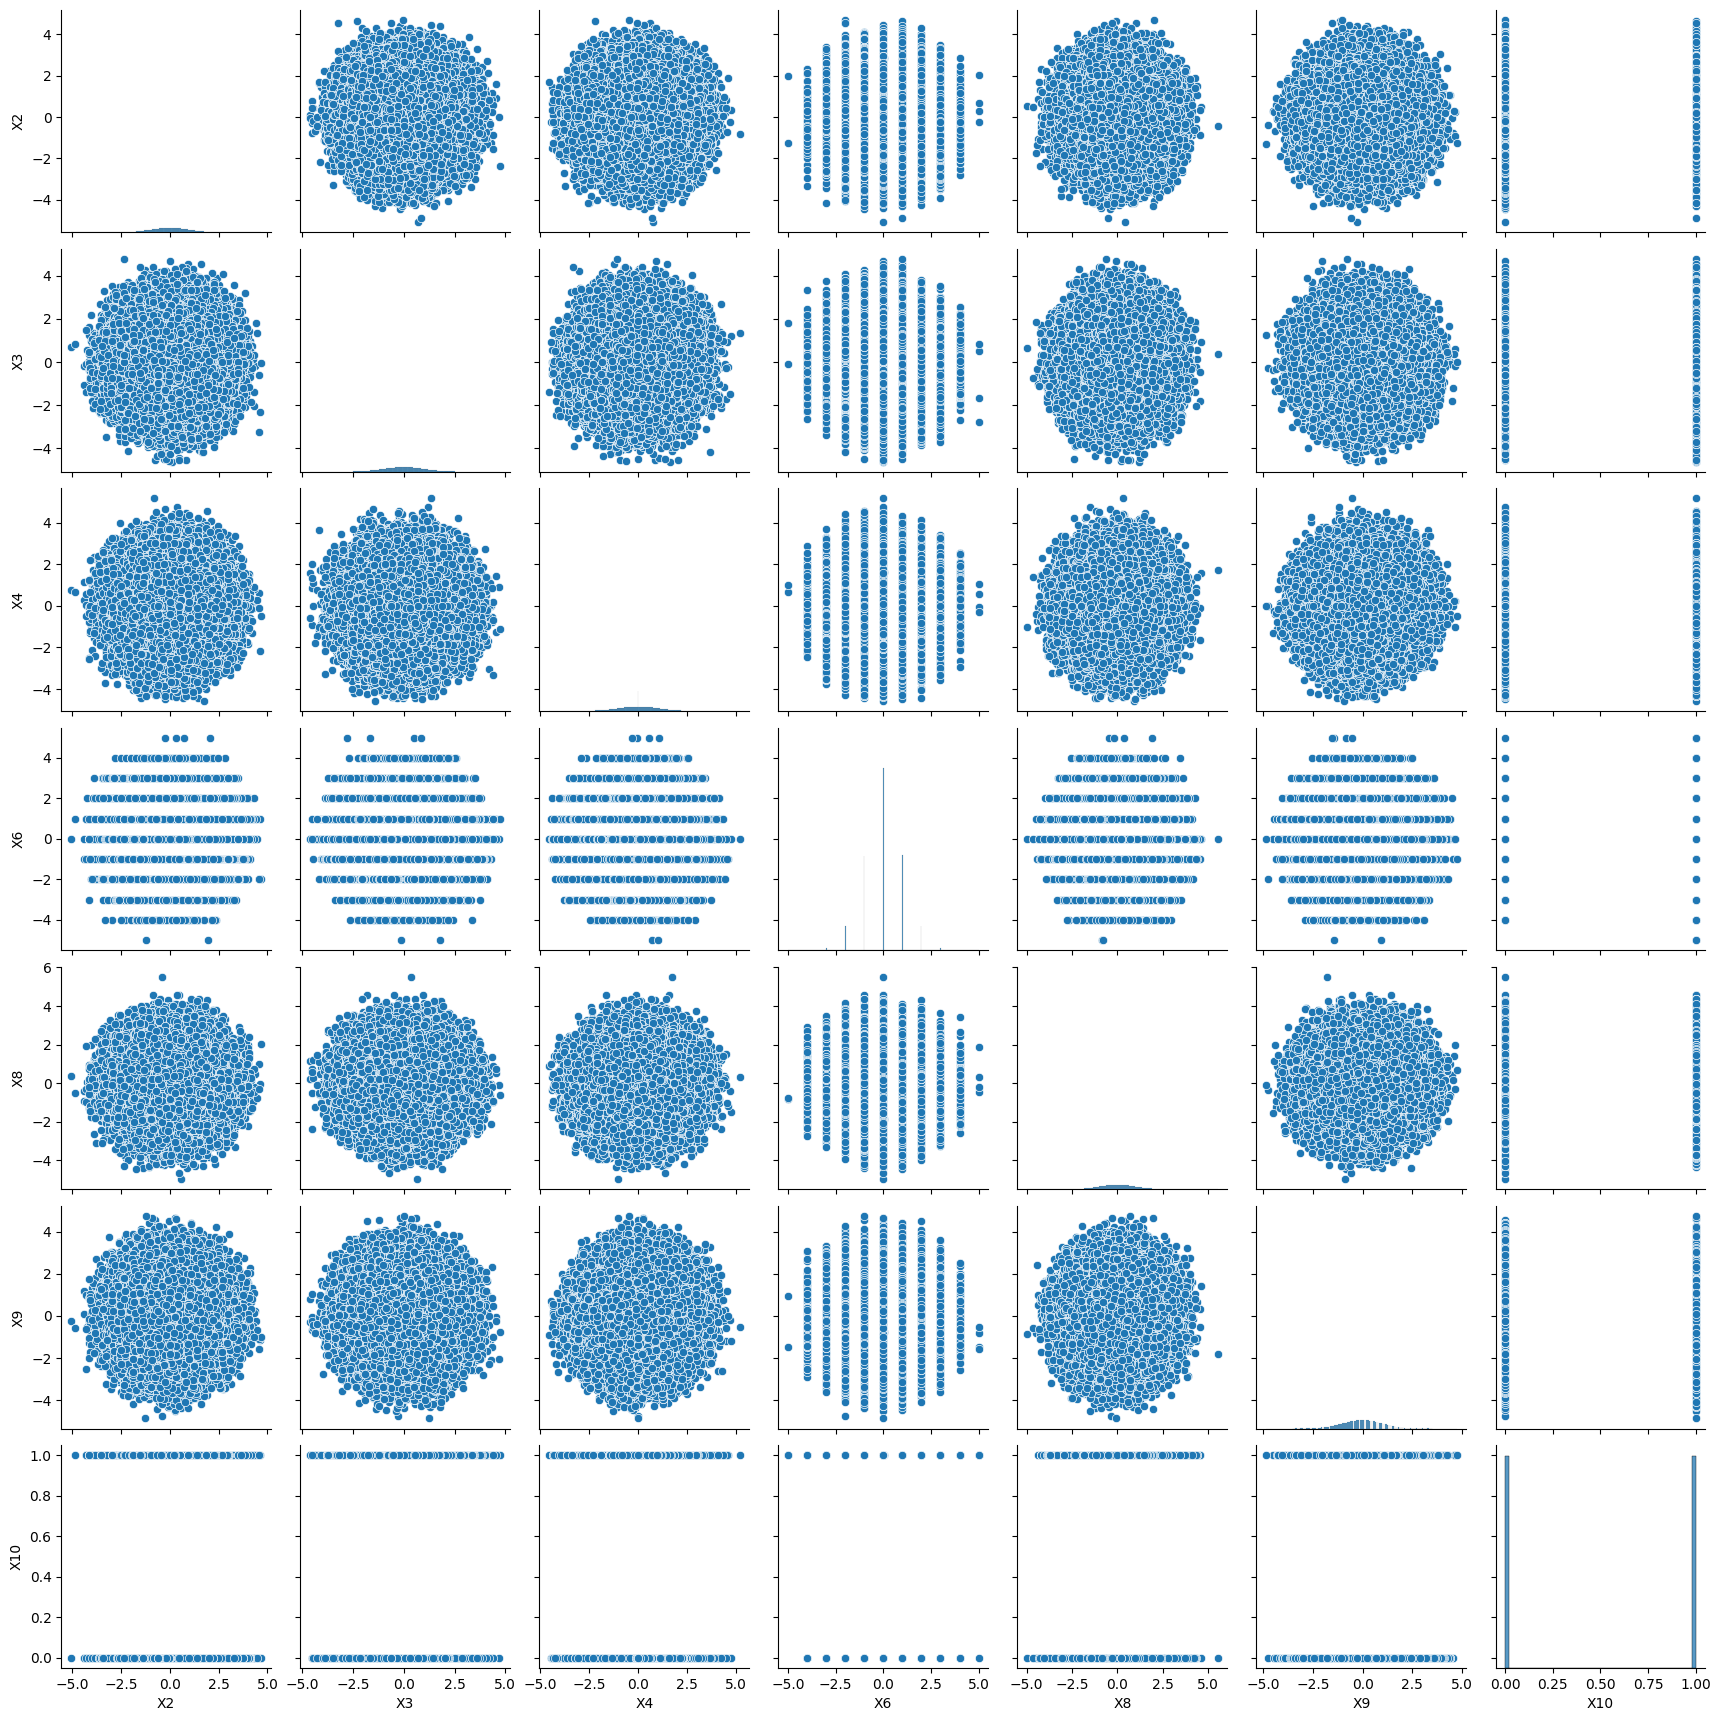

In [116]:
sns.pairplot(trainX[['X2', 'X3', 'X4', 'X6', 'X8', 'X9', 'X10']])
plt.show()

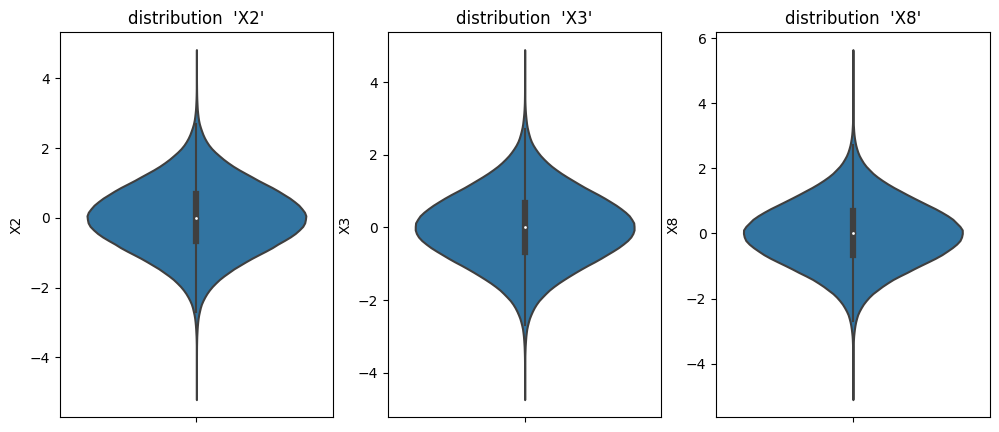

In [117]:
figure, ax_list = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(12,5)

cols = ['X2', 'X3', 'X8']

for i in range(3):
    col = cols[i]
    sns.violinplot(data=trainX, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")
    
# 분포가 고르기 때문에 로그 변환 X

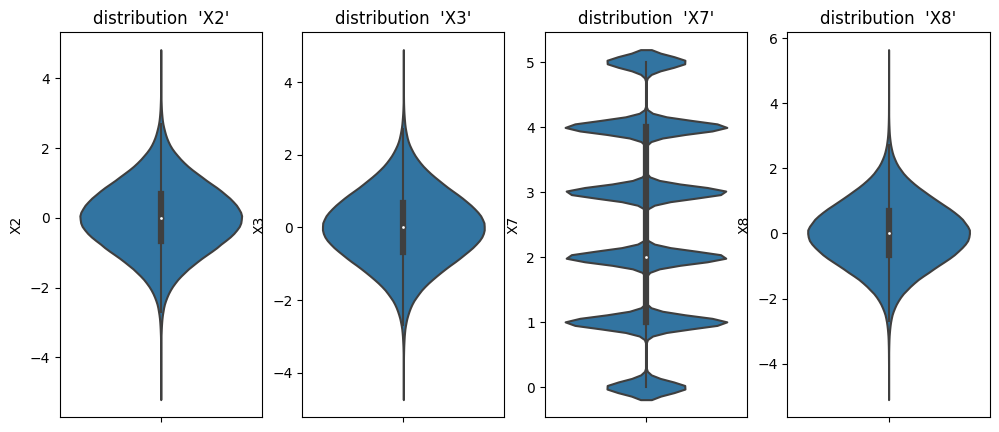

In [118]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

cols = ['X2', 'X3', 'X7', 'X8']

for i in range(4):
    col = cols[i]
    sns.violinplot(data=trainX2, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")
    
# 분포가 고르기 때문에 로그 변환 X

C:\Users\leebk\AppData\Local\Temp\ipykernel_1480\3176930270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainY,label="Y")


<Axes: xlabel='Y', ylabel='Density'>

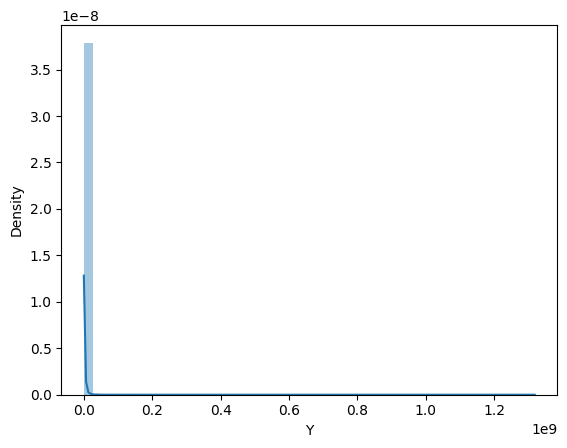

In [185]:
sns.distplot(trainY,label="Y")

# Y 로그 변환

In [112]:
trainY_log = np.log1p(trainY)

In [113]:
trainY_log

0          9.068988
1         13.611041
2         11.574700
3          9.292215
4         10.435161
            ...    
999995     8.863625
999996    11.985615
999997     9.485059
999998     8.499563
999999     9.187542
Name: Y, Length: 961376, dtype: float64

C:\Users\leebk\AppData\Local\Temp\ipykernel_1480\3283577974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainY_log,label="Y")


<Axes: xlabel='Y', ylabel='Density'>

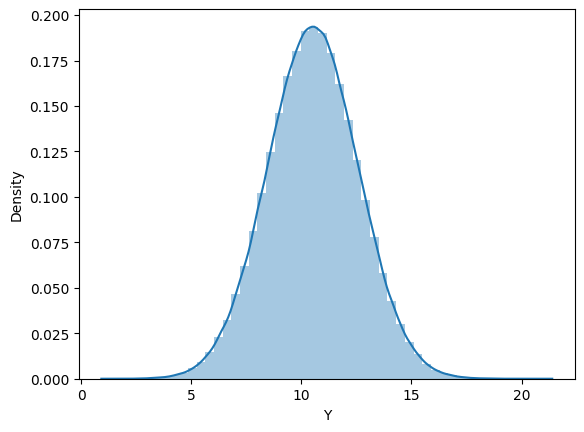

In [114]:
sns.distplot(trainY_log,label="Y")

In [169]:
testY_log = np.log1p(testY)

In [170]:
testY_log

0        9.506
1       10.531
2       12.753
3       10.072
4       14.291
         ...  
48594   12.962
48595   13.696
48597   10.357
48598    9.986
48599   13.215
Name: Y, Length: 46730, dtype: float64

C:\Users\leebk\AppData\Local\Temp\ipykernel_1480\4035678473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(testY_log,label="Y")


<Axes: xlabel='Y', ylabel='Density'>

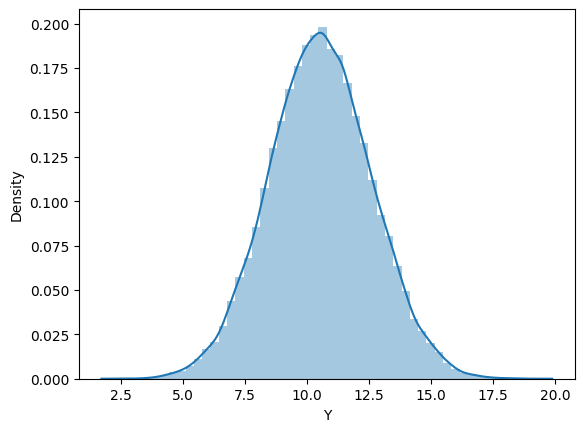

In [171]:
sns.distplot(testY_log,label="Y")

# 잔차 검진 - 모든 변수

In [188]:
model = sm.OLS(trainY_log, sm.add_constant(trainX))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.264e+06
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:17:21   Log-Likelihood:            -2.7244e+05
No. Observations:              961376   AIC:                         5.449e+05
Df Residuals:                  961358   BIC:                         5.451e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.067e+10      9e+10      0.674      0.5

- x2, x3, x7,x8,  x9

In [116]:
pd.options.display.float_format = '{:.3f}'.format

In [117]:
results.pvalues

const    0.500
X2       0.000
X3       0.000
X4       0.863
X6       0.076
X8       0.000
X9       0.000
X10      0.099
0        0.721
1        0.721
2        0.721
3        0.721
4        0.721
5        0.721
A1       0.926
A2       0.926
A3       0.926
A4       0.926
Group1   0.475
Group2   0.475
Group3   0.475
dtype: float64

In [121]:
model = sm.OLS(list(trainY2), sm.add_constant(trainX2))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4594.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:46:30   Log-Likelihood:            -1.6134e+07
No. Observations:             1000000   AIC:                         3.227e+07
Df Residuals:                  999986   BIC:                         3.227e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e+16   3.05e+17      0.101      0.9

- x2, x3, x7, x8, x9

## train data 1000개씩 뽑아서 잔차검진 10번 반복

In [189]:
train = trainX.join(trainY_log)
train

,X2,X3,X4,X6,X8,X9,X10,0,1,2,...,4,5,A1,A2,A3,A4,Group1,Group2,Group3,Y
0,-0.495,1.494,0.351,-0.002,2.075,0.236,0,0,0,0,...,0,0,0,0,0,1,0,1,0,9.069
1,1.755,-0.199,-0.014,0.000,-0.034,-0.465,1,0,0,0,...,1,0,0,0,0,1,0,1,0,13.611
2,-0.924,0.174,-1.409,0.998,-0.405,-0.615,1,0,0,0,...,0,1,0,0,1,0,1,0,0,11.575
3,-0.607,-1.778,1.595,-0.002,-0.705,0.836,0,0,0,1,...,0,0,1,0,0,0,0,1,0,9.292
4,0.766,-0.761,0.119,-0.002,2.101,-0.315,1,0,0,0,...,1,0,0,0,0,1,0,1,0,10.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.200,0.563,-0.840,1.997,0.362,-0.815,1,0,1,0,...,0,0,0,0,1,0,0,1,0,8.864
999996,-0.640,-0.612,-0.014,-2.001,-0.859,-1.065,0,0,0,0,...,0,1,0,0,1,0,0,1,0,11.986
999997,-1.557,-0.503,0.972,-1.001,-1.180,1.086,1,0,0,1,...,0,0,0,0,0,1,0,0,1,9.485
999998,-0.636,-1.641,1.147,-0.002,0.194,0.236,0,0,0,1,...,0,0,0,0,0,1,0,1,0,8.500


In [123]:
train2 = trainX2.join(trainY2)
train2

,X2,X3,X4,X6,X7,X8,X9,X10,A1,A2,A3,A4,Group1,Group2,Group3,Y
0,-0.495,1.494,0.351,-0.002,3,2.075,0.235,0,0,0,0,1,0,1,0,8680.833
1,1.756,-0.198,-0.014,0.000,4,-0.034,-0.465,1,0,0,0,1,0,1,0,815078.562
2,-0.924,0.174,-1.409,0.998,5,-0.405,-0.615,1,0,0,1,0,1,0,0,106371.230
3,-0.607,-1.777,1.595,-0.002,2,-0.705,0.836,0,1,0,0,0,0,1,0,10852.202
4,0.766,-0.760,0.119,-0.002,4,2.101,-0.315,1,0,0,0,1,0,1,0,34034.553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.200,0.563,-0.840,1.997,1,0.362,-0.815,1,0,0,1,0,0,1,0,7069.064
999996,-0.640,-0.611,-0.014,-2.000,5,-0.859,-1.065,0,0,0,1,0,0,1,0,160429.364
999997,-1.558,-0.503,0.972,-1.001,2,-1.179,1.086,1,0,0,0,1,0,0,1,13160.601
999998,-0.636,-1.640,1.147,-0.002,2,0.195,0.235,0,0,0,0,1,0,1,0,4911.622


In [190]:
for i in range(10):
    print(f'Iteration {i+1}')
    
    sample = np.random.choice(train.index, size=1000, replace=False)
    sub = train.loc[sample]

    x = sub.drop('Y', axis=1)
    y = sub.Y

    model = sm.OLS(y, sm.add_constant(x))
    results = model.fit()

    print('summary')
    print(results.summary())
    print(' ')
    print('-------------------')

Iteration 1
summary
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2345.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:21:07   Log-Likelihood:                -286.95
No. Observations:                1000   AIC:                             609.9
Df Residuals:                     982   BIC:                             698.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0252      0.010

- DATA3) t-value, p-value 고려한 변수 선택
    - X2, X3, X8, X9, A1-A4, G1-G3, 0-5

In [191]:
col3 = ['X2', 'X3', 'X8', 'X9', 'A1', 'A2', 'A3', 'A4', 'Group1', 'Group2', 'Group3', '0', '1', '2', '3', '4', '5']

- t-value, p-value 고려한 변수 선택
    - X2, X3, X7, X8, A1-A4, G1-G3

In [126]:
col = ['X2', 'X3', 'X7', 'X8', 'A1', 'A2', 'A3', 'A4', 'Group1', 'Group2', 'Group3']

In [127]:
for i in range(10):
    print(f'Iteration {i+1}')
    
    sample = np.random.choice(train2.index, size=1000, replace=False)
    sub = train2.loc[sample]

    x = sub.drop('Y', axis=1)
    y = sub.Y

    model = sm.OLS(y, sm.add_constant(x))
    results = model.fit()

    print('summary')
    print(results.summary())
    print(' ')
    print('-------------------')

Iteration 1
summary
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     9.007
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.06e-17
Time:                        18:46:42   Log-Likelihood:                -16161.
No. Observations:                1000   AIC:                         3.235e+04
Df Residuals:                     986   BIC:                         3.242e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.971e+05   1.15e+05

- t-value, p-value 고려한 변수 선택
    - X2, X3, X7, X8

In [128]:
col2 = ['X2', 'X3', 'X7', 'X8']

### 참고용 Lasso

In [129]:
from sklearn.linear_model import Lasso

In [130]:
lasso = Lasso(alpha=0.15)
lasso.fit(trainX, trainY_log)
print(trainX.columns)
print(lasso.coef_)

Index(['X2', 'X3', 'X4', 'X6', 'X8', 'X9', 'X10', '0', '1', '2', '3', '4', '5',
       'A1', 'A2', 'A3', 'A4', 'Group1', 'Group2', 'Group3'],
      dtype='object')
[ 1.11844135  0.19988003  0.         -0.         -0.74265545  0.02050547
  0.         -0.77137543 -0.36383753 -0.          0.          0.36482786
  0.76748996 -0.          0.         -0.         -0.          0.
 -0.          0.        ]


In [131]:
coefs = lasso.coef_
sorted_col = [column for _, column in sorted(zip(coefs, trainX.columns))]
sorted_col

['0',
 'X8',
 '1',
 '2',
 '3',
 'A1',
 'A2',
 'A3',
 'A4',
 'Group1',
 'Group2',
 'Group3',
 'X10',
 'X4',
 'X6',
 'X9',
 'X3',
 '4',
 '5',
 'X2']

In [132]:
testX

,X2,X3,X4,X6,X8,X9,X10,0,1,2,3,4,5,A1,A2,A3,A4,Group1,Group2,Group3
0,0.289,0.760,0.342,0.996,0.817,0.790,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1.045,1.372,1.598,-0.005,1.010,-0.061,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0.680,1.665,-1.673,0.996,-1.345,0.590,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,-0.643,0.293,0.788,0.996,0.523,1.390,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1.135,1.021,0.171,-0.005,-1.598,-0.561,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48594,0.267,1.720,0.774,0.996,1.708,0.640,1,0,0,0,0,0,1,1,0,0,0,0,1,0
48595,1.614,-1.473,0.570,-0.005,-2.424,-0.461,1,0,0,1,0,0,0,1,0,0,0,0,1,0
48597,-0.989,0.442,0.003,-0.005,-0.564,2.090,0,0,0,0,1,0,0,1,0,0,0,1,0,0
48598,0.355,1.166,-0.786,-0.005,0.903,1.290,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [135]:
forecast_log = lasso.predict(testX)
forecast = np.expm1(forecast_log)
print(forecast[0:10])

[ 23041.45875195  51621.44255844 305213.61749203  13412.25461122
 526032.69617742  18048.69194276   6445.21148271  32270.68690933
   9661.760555    15670.69610487]


In [136]:
testY.iloc[0:10]

0     13441.947
1     37465.056
2    345725.740
3     23663.050
4   1608375.729
5     11948.207
6      6200.456
7     26403.620
8      4784.260
9     27378.839
Name: Y, dtype: float64

<Axes: >

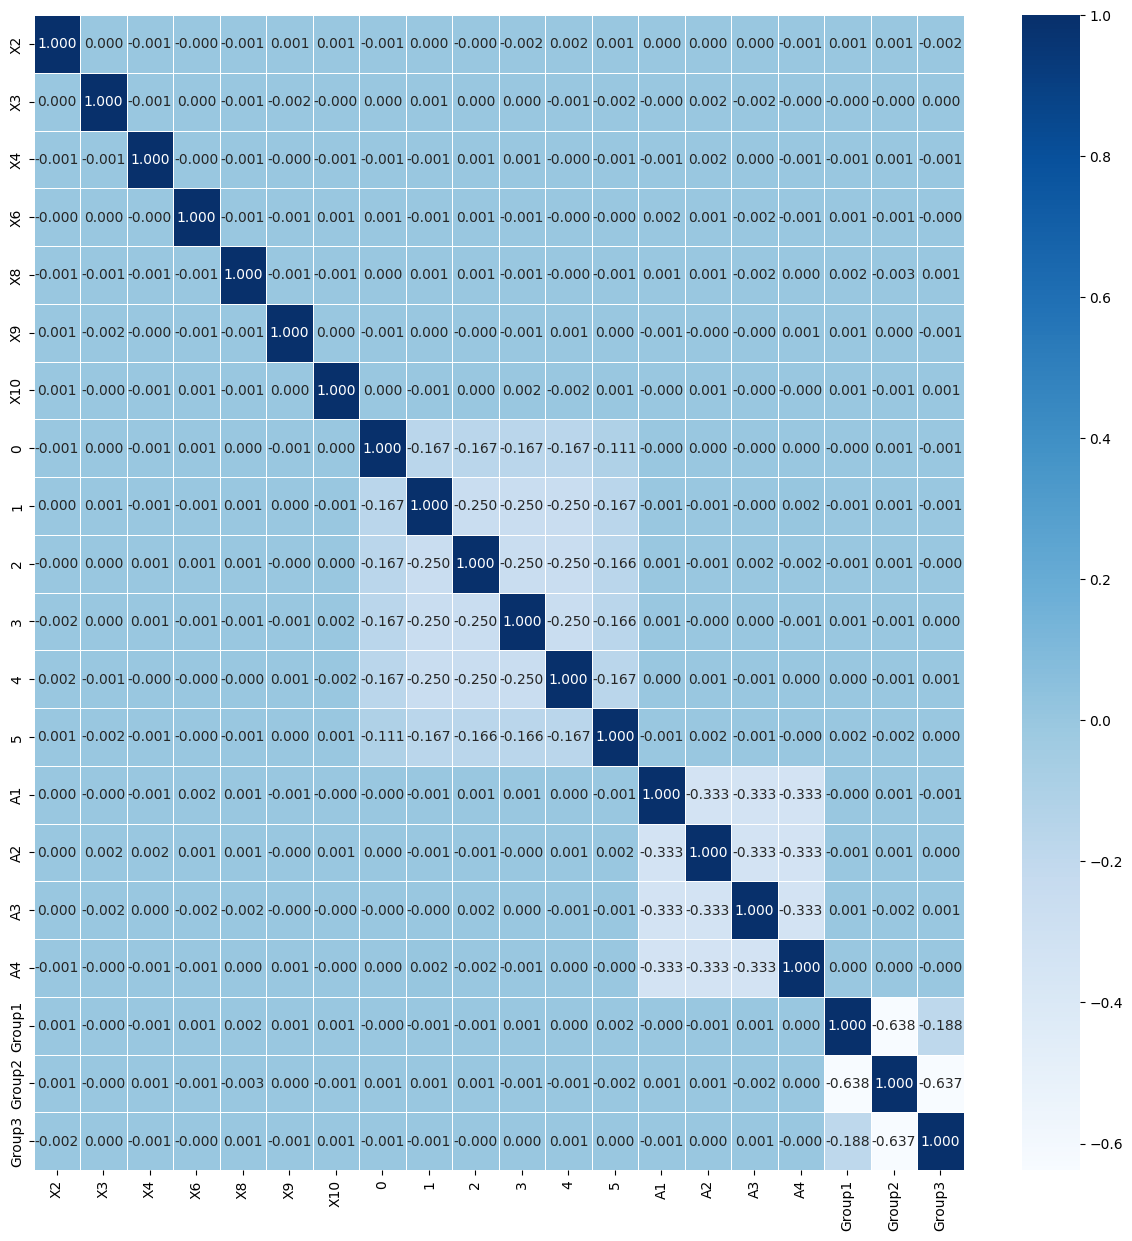

In [137]:
plt.figure(figsize=(15,15))
sns.heatmap(data = trainX.corr(), annot=True, 
fmt = '.3f', linewidths=.5, cmap='Blues')

## VIF

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

list = []

for i in range(trainX.shape[1]):
    v = variance_inflation_factor(trainX.values, i) 
    list.append(v)
    
vif["VIF Factor"] = list
vif["features"] = trainX.columns
vif

,VIF Factor,features
0,1.000,X2
1,1.000,X3
2,1.000,X4
3,1.000,X6
4,1.000,X8
5,1.000,X9
6,1.000,X10
7,1283719225.125,0
8,56092534.597,1
9,2491589103.181,2


## OLS

In [193]:
model = sm.OLS(trainY_log, sm.add_constant(trainX[col3]))
result_log = model.fit()
# results = np.expm1(result_log)
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.749e+06
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:26:08   Log-Likelihood:            -2.7242e+05
No. Observations:              961376   AIC:                         5.449e+05
Df Residuals:                  961361   BIC:                         5.451e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.111e+11   1.16e+11     -0.955      0.3

In [145]:
model = sm.OLS(trainY2, sm.add_constant(trainX2[col2]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                 1.481e+04
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:51:49   Log-Likelihood:            -1.6135e+07
No. Observations:             1000000   AIC:                         3.227e+07
Df Residuals:                  999995   BIC:                         3.227e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.559e+05   4781.364    -53.519      0.0

## Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression

In [194]:
lr = LinearRegression(n_jobs=-1)   

### OLS columns

In [158]:
result = lr.fit(trainX[col3], trainY_log)
print(result.coef_)

[ 1.26689112e+00  3.51596195e-01 -8.90983340e-01  1.69463948e-01
  5.30826377e+10  5.30826377e+10  5.30826377e+10  5.30826377e+10
 -1.89210318e+11 -1.89210318e+11 -1.89210318e+11  6.02355854e+10
  6.02355854e+10  6.02355854e+10  6.02355854e+10  6.02355854e+10
  6.02355854e+10]


In [162]:
pred3_log = lr.predict(testX[col3])
pred3 = np.expm1(pred3_log)
print(pred3[0:10])

[  12717.79604216   29944.79416213  416064.77212368   20206.07039693
 1181540.29019616   13647.60806653    5568.33266852   22570.52827246
    3747.32720737   22773.26001448]


In [172]:
accuracy = lr.score(testX[col3], testY_log)  
print(accuracy)

0.9761505875908276


In [173]:
print("train: ", lr.score(trainX[col3], trainY_log))
print("test: ", lr.score(testX[col3], testY_log))

train:  0.9756314428536542
test:  0.9761505875908276


#### data2

In [174]:
result = lr.fit(trainX2[col2], trainY2)
print(result.coef_)

[ 393101.33152143  110708.12763475  226069.66025595 -275839.18186622]


In [175]:
pred2 = lr.predict(testX2[col2])
print(pred2[0:10])

[ -57459.15345344  253995.11103301 1019039.79533117   57796.13779811
 1422515.13270799  126593.87491142 -240788.90307793  157728.35355784
 -350220.57382104  150110.18596626]


In [176]:
accuracy = lr.score(testX2[col2], testY2)  
print(accuracy)

0.08868003008670722


In [177]:
print("train: ", lr.score(trainX2[col2], trainY2))
print("test: ", lr.score(testX2[col2], testY2))

train:  0.05592044133893337
test:  0.08868003008670722


## 성능 평가 함수

In [195]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY, pred3)
print(f'MSE: {mse:.3f}')

MSE: 1542328389766.551


-- 참고

### Lasso columns

In [ ]:
result = lr.fit(trainX2[la_col], trainY2)
print(result.coef_)

In [ ]:
pred = lr.predict(testX2[la_col])
print(pred[0:10])

In [ ]:
accuracy = lr.score(testX2[la_col], testY2)    # 결정계수
print(accuracy)

### rescale

In [ ]:
x_rescale = scaler.inverse_transform(trainX[tnumeric])
test_rescale = scaler.inverse_transform(testX[tnumeric])

In [ ]:
result = lr.fit(x_rescale, trainY)
print(result.coef_)

In [ ]:
pred = lr.predict(test_rescale)
print(pred[0:10])

In [ ]:
accuracy = lr.score(test_rescale, testY)    # 결정계수
print(accuracy)